In [57]:
from google_play_scraper import reviews, Sort

app_id = 'cw.co.id'

def get_reviews(app_id, lang='id', count=1500, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )
        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
    print("Jumlah ulasan:", len(reviews))
    if len(reviews) > 0:
        print("Contoh ulasan:")
        print(reviews[0])
else:
    print("Tidak dapat mengambil ulasan.")



Jumlah ulasan: 1301
Contoh ulasan:
{'reviewId': '1dac0775-0749-473f-92e2-063bb333a530', 'userName': 'Moch alfutu Dinata Hukum 22', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIZ8lKCemYLXw-4d9ZSHoYq1gVxSdGuwUDJ2eF4Kirjj8E5Vg=mo', 'content': 'top', 'score': 4, 'thumbsUpCount': 0, 'reviewCreatedVersion': '1.3.2', 'at': datetime.datetime(2025, 7, 14, 14, 12), 'replyContent': None, 'repliedAt': None, 'appVersion': '1.3.2'}


In [ ]:
import csv

def export_to_csv(reviews, file_name='youtube_comments_export.csv'):
    if reviews:
        fieldnames = ['Username', 'Review Text', 'Likes', 'Date']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'Username': review['author'],
                    'Review Text': review['text'],
                    'Likes': review['likes'],
                    'Date': review['published_at']
                })

        print(f"Ulasan berhasil disimpan ke {file_name}")
    else:
        print("Tidak ada ulasan yang ditemukan.")


Ulasan berhasil disimpan ke hasil_scraper_ulasan_app_persib.csv


In [5]:
import pandas as pd

df = pd.read_csv('youtube_comments_export.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Username     482 non-null    object
 1   Review Text  482 non-null    object
 2   Likes        482 non-null    int64 
 3   Date         482 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.2+ KB


In [6]:
import pandas as pd

data = pd.read_csv('youtube_comments_export.csv')
data.head(5)


,Username,Review Text,Likes,Date
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z


In [7]:
import pandas as pd
data = pd.read_csv('youtube_comments_export.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Username     482 non-null    object
 1   Review Text  482 non-null    object
 2   Likes        482 non-null    int64 
 3   Date         482 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.2+ KB


In [8]:
data.head(2)

,Username,Review Text,Likes,Date
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z


In [9]:
df = pd.DataFrame(data[['Username', 'Review Text', 'Likes', 'Date']])
df.head(5)


,Username,Review Text,Likes,Date
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Username     482 non-null    object
 1   Review Text  482 non-null    object
 2   Likes        482 non-null    int64 
 3   Date         482 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.2+ KB


In [11]:
df.drop_duplicates(subset="Review Text", keep='first', inplace=True)


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 481
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Username     477 non-null    object
 1   Review Text  477 non-null    object
 2   Likes        477 non-null    int64 
 3   Date         477 non-null    object
dtypes: int64(1), object(3)
memory usage: 18.6+ KB


In [13]:
df.head(2)

,Username,Review Text,Likes,Date
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z


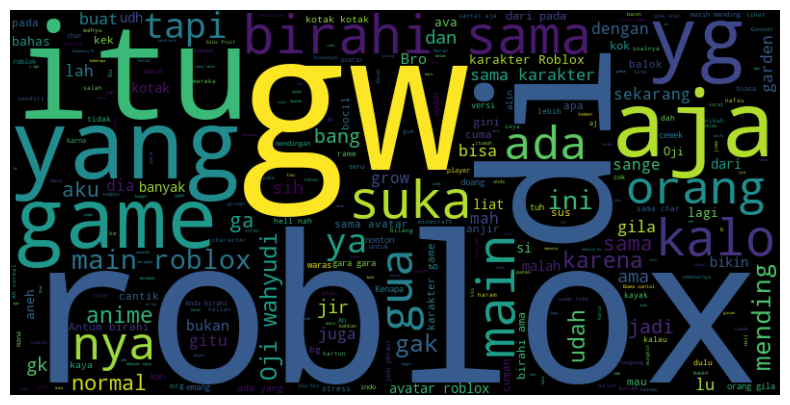

In [14]:
#  sebelum preprocesing
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
df['Review Text'] = df['Review Text'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


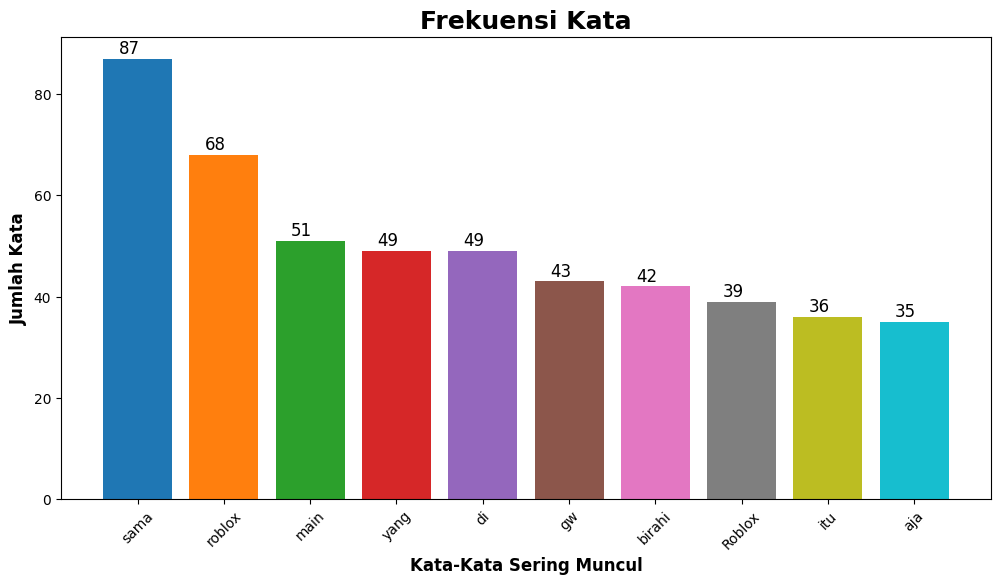

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan semua teks ulasan
text = " ".join(df["Review Text"])

# Tokenisasi dan hitung frekuensi kata
tokens = text.split()
word_counts = Counter(tokens)

# Ambil 10 kata yang paling sering muncul
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

# Buat plot bar
plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num),
             fontsize=12, color='black', ha='center')

plt.show()


In [17]:
import re  # Tambahkan baris ini
def remove_URL(text):
    return re.sub(r"http\S+|www.\S+", "", text)

def remove_html(text):
    return re.sub(r'<.*?>', '', text)

def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("[" 
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F700-\U0001F77F"
            u"\U0001F780-\U0001F7FF"
            u"\U0001F800-\U0001F8FF"
            u"\U0001F900-\U0001F9FF"
            u"\U0001FA00-\U0001FA6F"
            u"\U0001FA70-\U0001FAFF"
            u"\U00002702-\U000027B0"
            u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d+', '', tweet)
    return tweet

# Terapkan ke dataframe
df['cleaning'] = df['Review Text'].apply(remove_URL)
df['cleaning'] = df['cleaning'].apply(remove_html)
df['cleaning'] = df['cleaning'].apply(remove_emoji)
df['cleaning'] = df['cleaning'].apply(remove_symbols)
df['cleaning'] = df['cleaning'].apply(remove_numbers)

df.head(10)


,Username,Review Text,Likes,Date,cleaning
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z,Cuman gmn aja bikin birahi aneh njirr
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z,Mending versi fanart apa cosplay ny dari pada...
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z,Kotak kotak anjirr
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z,Terakhirnya cokkk
5,@nihayah212,Mending berhenti buka buka aurat Allah tidak a...,0,2025-07-14T03:23:27Z,Mending berhenti buka buka aurat Allah tidak a...
6,@DhavinApin,Em masalah nya gw cowok cok najis jadi cewek,0,2025-07-13T20:34:40Z,Em masalah nya gw cowok cok najis jadi cewek
7,@Eugenz-Satria,Anomaly:oi ayo main Roblox banyak karakter yan...,0,2025-07-13T16:08:57Z,Anomalyoi ayo main Roblox banyak karakter yang...
8,@aryanesa-jy6go,Bukti pria punya selera 😂,0,2025-07-13T14:57:19Z,Bukti pria punya selera
9,@Looked209,Jawaban nya ga normal kalo cuma suka ama chara...,0,2025-07-13T11:01:34Z,Jawaban nya ga normal kalo cuma suka ama chara...


In [18]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,Username,Review Text,Likes,Date,cleaning,case_folding
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z,Cuman gmn aja bikin birahi aneh njirr,cuman gmn aja bikin birahi aneh njirr
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z,Mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay ny dari pada...
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z,Kotak kotak anjirr,kotak kotak anjirr
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,bawa santai aja lah suka gpp yakan kita gbisa ...
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z,Terakhirnya cokkk,terakhirnya cokkk


In [19]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    # Perhatikan: fungsi hash() bawaan Python akan digunakan di sini.
                    # Jika 'hash' adalah fungsi kustom, pastikan sudah didefinisikan di tempat lain.
                    kata_tidak_baku_hash.append(hash(word)) 
                # else:
                    # Baris-baris ini dikomentari di tangkapan layar asli.
                    # replaced_words.append('<karakter eksplisit>')
                    # kalimat_baku.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ""
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [20]:
# Baca dataset
data = pd.DataFrame(df[['Username', 'Review Text', 'Likes', 'Date', 'cleaning', 'case_folding']])
data.head(5)

,Username,Review Text,Likes,Date,cleaning,case_folding
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z,Cuman gmn aja bikin birahi aneh njirr,cuman gmn aja bikin birahi aneh njirr
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z,Mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay ny dari pada...
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z,Kotak kotak anjirr,kotak kotak anjirr
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,bawa santai aja lah suka gpp yakan kita gbisa ...
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z,Terakhirnya cokkk,terakhirnya cokkk


In [21]:
kamus_data = pd.read_csv("kamuskatabaku.csv")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))


In [22]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = \
zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

# data.head(100) # Ini dikomentari di screenshot asli

df = pd.DataFrame(data[['Username', 'Review Text', 'Likes', 'Date', 'cleaning', 'case_folding', 'normalisasi']])

df.head(20)

,Username,Review Text,Likes,Date,cleaning,case_folding,normalisasi
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z,Cuman gmn aja bikin birahi aneh njirr,cuman gmn aja bikin birahi aneh njirr,cuman bagaimana saja bikin birahi aneh anjir
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z,Mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay nya dari pada...
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z,Kotak kotak anjirr,kotak kotak anjirr,kotak kotak anjir
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,bawa santai aja lah suka gpp yakan kita gbisa ...,bawa santai saja lah suka yakan kita gbisa apa...
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z,Terakhirnya cokkk,terakhirnya cokkk,terakhirnya cokkk
5,@nihayah212,Mending berhenti buka buka aurat Allah tidak a...,0,2025-07-14T03:23:27Z,Mending berhenti buka buka aurat Allah tidak a...,mending berhenti buka buka aurat allah tidak a...,mending berhenti buka buka aurat allah tidak a...
6,@DhavinApin,Em masalah nya gw cowok cok najis jadi cewek,0,2025-07-13T20:34:40Z,Em masalah nya gw cowok cok najis jadi cewek,em masalah nya gw cowok cok najis jadi cewek,em masalah ya gue cowok cok najis jadi cewek
7,@Eugenz-Satria,Anomaly:oi ayo main Roblox banyak karakter yan...,0,2025-07-13T16:08:57Z,Anomalyoi ayo main Roblox banyak karakter yang...,anomalyoi ayo main roblox banyak karakter yang...,anomalyoi ayo main roblox banyak karakter yang...
8,@aryanesa-jy6go,Bukti pria punya selera 😂,0,2025-07-13T14:57:19Z,Bukti pria punya selera,bukti pria punya selera,bukti pria punya selera
9,@Looked209,Jawaban nya ga normal kalo cuma suka ama chara...,0,2025-07-13T11:01:34Z,Jawaban nya ga normal kalo cuma suka ama chara...,jawaban nya ga normal kalo cuma suka ama chara...,jawaban ya tidak normal kalau cuma suka sama c...


In [23]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,Username,Review Text,Likes,Date,cleaning,case_folding,normalisasi,tokenize
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z,Cuman gmn aja bikin birahi aneh njirr,cuman gmn aja bikin birahi aneh njirr,cuman bagaimana saja bikin birahi aneh anjir,"[cuman, bagaimana, saja, bikin, birahi, aneh, ..."
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z,Mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay nya dari pada...,"[mending, versi, fanart, apa, cosplay, nya, da..."
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z,Kotak kotak anjirr,kotak kotak anjirr,kotak kotak anjir,"[kotak, kotak, anjir]"
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,bawa santai aja lah suka gpp yakan kita gbisa ...,bawa santai saja lah suka yakan kita gbisa apa...,"[bawa, santai, saja, lah, suka, yakan, kita, g..."
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z,Terakhirnya cokkk,terakhirnya cokkk,terakhirnya cokkk,"[terakhirnya, cokkk]"


In [24]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Hanya perlu dijalankan sekali
stop_words = stopwords.words('indonesian')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Username,Review Text,Likes,Date,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z,Cuman gmn aja bikin birahi aneh njirr,cuman gmn aja bikin birahi aneh njirr,cuman bagaimana saja bikin birahi aneh anjir,"[cuman, bagaimana, saja, bikin, birahi, aneh, ...","[cuman, bikin, birahi, aneh, anjir]"
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z,Mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay nya dari pada...,"[mending, versi, fanart, apa, cosplay, nya, da...","[mending, versi, fanart, cosplay, nya, versi, ..."
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z,Kotak kotak anjirr,kotak kotak anjirr,kotak kotak anjir,"[kotak, kotak, anjir]","[kotak, kotak, anjir]"
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,bawa santai aja lah suka gpp yakan kita gbisa ...,bawa santai saja lah suka yakan kita gbisa apa...,"[bawa, santai, saja, lah, suka, yakan, kita, g...","[bawa, santai, suka, yakan, gbisa, cantik, doa..."
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z,Terakhirnya cokkk,terakhirnya cokkk,terakhirnya cokkk,"[terakhirnya, cokkk]","[terakhirnya, cokkk]"


In [27]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [28]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,Username,Review Text,Likes,Date,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z,Cuman gmn aja bikin birahi aneh njirr,cuman gmn aja bikin birahi aneh njirr,cuman bagaimana saja bikin birahi aneh anjir,"[cuman, bagaimana, saja, bikin, birahi, aneh, ...","[cuman, bikin, birahi, aneh, anjir]",cuman bikin birah aneh anjir
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z,Mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay nya dari pada...,"[mending, versi, fanart, apa, cosplay, nya, da...","[mending, versi, fanart, cosplay, nya, versi, ...",mending versi fanart cosplay nya versi balok a...
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z,Kotak kotak anjirr,kotak kotak anjirr,kotak kotak anjir,"[kotak, kotak, anjir]","[kotak, kotak, anjir]",kotak kotak anjir
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,bawa santai aja lah suka gpp yakan kita gbisa ...,bawa santai saja lah suka yakan kita gbisa apa...,"[bawa, santai, saja, lah, suka, yakan, kita, g...","[bawa, santai, suka, yakan, gbisa, cantik, doa...",bawa santai suka yakan gbisa cantik doang mend...
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z,Terakhirnya cokkk,terakhirnya cokkk,terakhirnya cokkk,"[terakhirnya, cokkk]","[terakhirnya, cokkk]",akhir cokkk


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 481
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Username          477 non-null    object
 1   Review Text       477 non-null    object
 2   Likes             477 non-null    int64 
 3   Date              477 non-null    object
 4   cleaning          477 non-null    object
 5   case_folding      477 non-null    object
 6   normalisasi       477 non-null    object
 7   tokenize          477 non-null    object
 8   stopword removal  477 non-null    object
 9   steming_data      477 non-null    object
dtypes: int64(1), object(9)
memory usage: 41.0+ KB


In [30]:
df.to_csv('Hasil_Preprosessing_Data.csv', encoding='utf8', index=False)

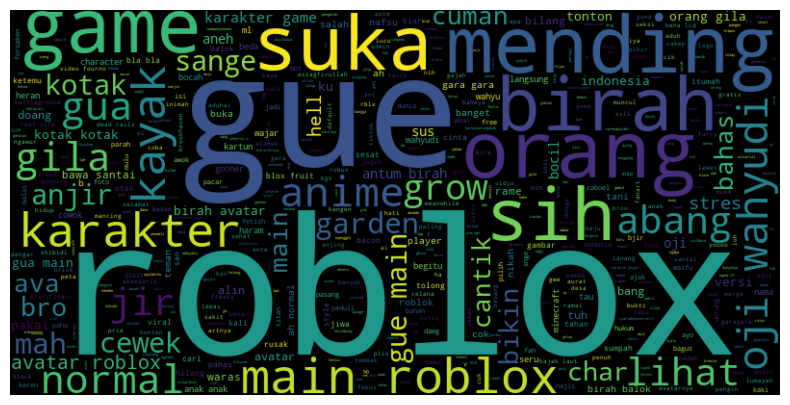

In [31]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
df['steming_data'] = df['steming_data'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'yang', 'dan', '...', 'ini','ya','dan','nya','buat','pas'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

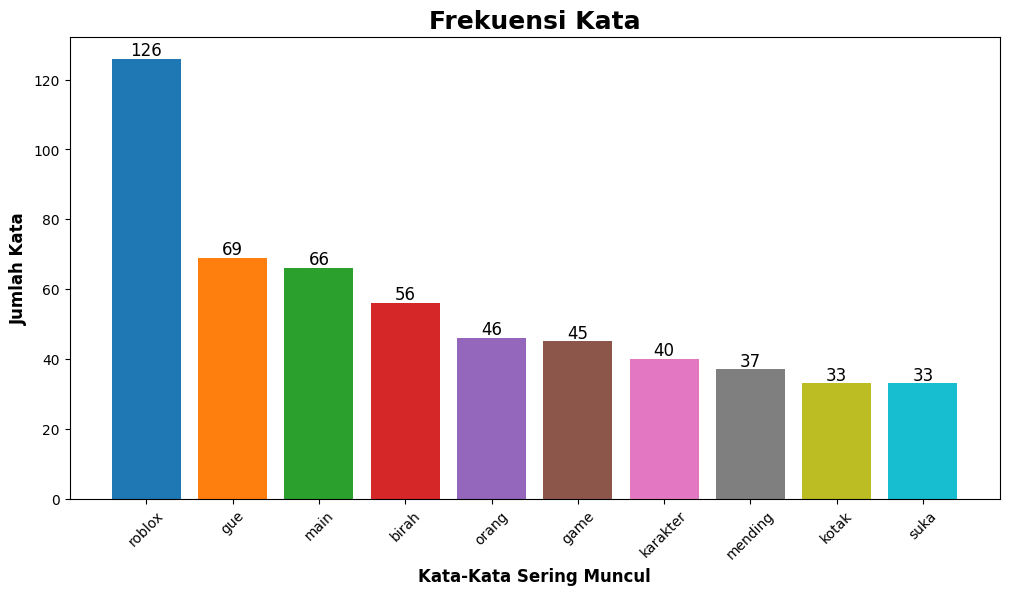

In [32]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

text = " ".join(df["steming_data"])

# Tambahkan kata-kata stopwords khusus
stopwords = set(STOPWORDS)
stopwords.update(['https', 'yang', 'di', '...', 'dan', 'ya', 'ini', 'nya', 'buat', 'pas'])

# Tokenisasi dan hapus stopwords
tokens = [word for word in text.split() if word not in stopwords]

# Hitung frekuensi kata
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Plot
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tambahkan label di atas bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()


In [33]:
# LABELLING DATA LEXICON BASED
import pandas as pd

data = pd.read_csv("Hasil_Preprosessing_Data.csv")
data.head(5)

,Username,Review Text,Likes,Date,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z,Cuman gmn aja bikin birahi aneh njirr,cuman gmn aja bikin birahi aneh njirr,cuman bagaimana saja bikin birahi aneh anjir,"['cuman', 'bagaimana', 'saja', 'bikin', 'birah...","['cuman', 'bikin', 'birahi', 'aneh', 'anjir']",cuman bikin birah aneh anjir
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z,Mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay nya dari pada...,"['mending', 'versi', 'fanart', 'apa', 'cosplay...","['mending', 'versi', 'fanart', 'cosplay', 'nya...",mending versi fanart cosplay nya versi balok a...
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z,Kotak kotak anjirr,kotak kotak anjirr,kotak kotak anjir,"['kotak', 'kotak', 'anjir']","['kotak', 'kotak', 'anjir']",kotak kotak anjir
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,bawa santai aja lah suka gpp yakan kita gbisa ...,bawa santai saja lah suka yakan kita gbisa apa...,"['bawa', 'santai', 'saja', 'lah', 'suka', 'yak...","['bawa', 'santai', 'suka', 'yakan', 'gbisa', '...",bawa santai suka yakan gbisa cantik doang mend...
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z,Terakhirnya cokkk,terakhirnya cokkk,terakhirnya cokkk,"['terakhirnya', 'cokkk']","['terakhirnya', 'cokkk']",akhir cokkk


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Username          477 non-null    object
 1   Review Text       477 non-null    object
 2   Likes             477 non-null    int64 
 3   Date              477 non-null    object
 4   cleaning          470 non-null    object
 5   case_folding      470 non-null    object
 6   normalisasi       470 non-null    object
 7   tokenize          477 non-null    object
 8   stopword removal  477 non-null    object
 9   steming_data      465 non-null    object
dtypes: int64(1), object(9)
memory usage: 37.4+ KB


In [35]:
df = data.dropna()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465 entries, 0 to 476
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Username          465 non-null    object
 1   Review Text       465 non-null    object
 2   Likes             465 non-null    int64 
 3   Date              465 non-null    object
 4   cleaning          465 non-null    object
 5   case_folding      465 non-null    object
 6   normalisasi       465 non-null    object
 7   tokenize          465 non-null    object
 8   stopword removal  465 non-null    object
 9   steming_data      465 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


In [37]:
print("Kolom yang tersedia:", df.columns.tolist())


Kolom yang tersedia: ['Username', 'Review Text', 'Likes', 'Date', 'cleaning', 'case_folding', 'normalisasi', 'tokenize', 'stopword removal', 'steming_data']


In [42]:
# # Labeling berdasarkan skor bintang
# # def label_from_score(score):
# #     if score in [1, 2]:
# #         return "Negatif"
# #     elif score == 3:
# #         return "Netral"
# #     elif score in [4, 5]:
# #         return "Positif"
# #     else:
# #         return None  # Untuk nilai tidak valid
    

# # df['Sentiment'] = df['Rating'].apply(label_from_score)

# # df.head()






# import pandas as pd

# # Fungsi untuk menentukan sentimen
# def determine_sentiment(text):
#     positive_count = sum(1 for word in text.split() if word in positive_lexicon)
#     negative_count = sum(1 for word in text.split() if word in negative_lexicon)
#     if positive_count > negative_count:
#         return "Positif"
#     elif positive_count < negative_count:
#         return "Negatif"
#     else:
#         # Jika jumlah positif dan negatif sama, atau keduanya nol
#         return None  # Mengembalikan None untuk ditangani oleh fungsi berikutnya

# # Baca kamus leksikon positif dan negatif
# positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
# negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

# def replace_none_sentiment(sentiments):
#     # Inisialisasi replace_flag untuk pergantian sentimen
#     # Asumsi awal sentimen yang diganti adalah "Positif"
#     replace_flag = "Positif"
#     for i in range(len(sentiments)):
#         if sentiments[i] is None:
#             sentiments[i] = replace_flag
#             # Ganti flag untuk pergantian berikutnya
#             replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
#     return sentiments

# df['Sentiment'] = df['steming_data'].apply(determine_sentiment)
# df['Sentiment'] = replace_none_sentiment(df['Sentiment'].tolist())

# df.head() # Menggunakan df.head() tanpa argumen akan menampilkan 5 baris pertama secara default






import pandas as pd

# Baca kamus leksikon positif dan negatif
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    
    if positive_count > negative_count:
        return "Positif"
    elif positive_count < negative_count:
        return "Negatif"
    else:
        return "Netral"

# Terapkan ke DataFrame
df['Sentiment'] = df['steming_data'].apply(determine_sentiment)

# Tampilkan hasil
df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_3724\2989770452.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['steming_data'].apply(determine_sentiment)


,Username,Review Text,Likes,Date,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z,Cuman gmn aja bikin birahi aneh njirr,cuman gmn aja bikin birahi aneh njirr,cuman bagaimana saja bikin birahi aneh anjir,"['cuman', 'bagaimana', 'saja', 'bikin', 'birah...","['cuman', 'bikin', 'birahi', 'aneh', 'anjir']",cuman bikin birah aneh anjir,Negatif
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z,Mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay nya dari pada...,"['mending', 'versi', 'fanart', 'apa', 'cosplay...","['mending', 'versi', 'fanart', 'cosplay', 'nya...",mending versi fanart cosplay nya versi balok a...,Negatif
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z,Kotak kotak anjirr,kotak kotak anjirr,kotak kotak anjir,"['kotak', 'kotak', 'anjir']","['kotak', 'kotak', 'anjir']",kotak kotak anjir,Negatif
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,bawa santai aja lah suka gpp yakan kita gbisa ...,bawa santai saja lah suka yakan kita gbisa apa...,"['bawa', 'santai', 'saja', 'lah', 'suka', 'yak...","['bawa', 'santai', 'suka', 'yakan', 'gbisa', '...",bawa santai suka yakan gbisa cantik doang mend...,Netral
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z,Terakhirnya cokkk,terakhirnya cokkk,terakhirnya cokkk,"['terakhirnya', 'cokkk']","['terakhirnya', 'cokkk']",akhir cokkk,Netral


C:\Users\user\AppData\Local\Temp\ipykernel_3724\376280042.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


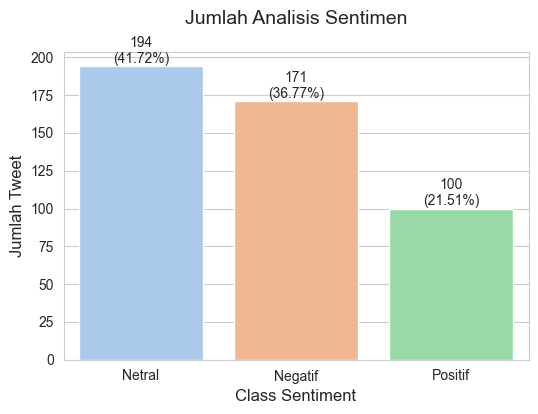

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = df['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(df['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [45]:
df.to_csv('Hasil_Labelling_Data.csv', encoding='utf8', index=False)

In [46]:
# MODEL SVM
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.head()

,Username,Review Text,Likes,Date,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z,Cuman gmn aja bikin birahi aneh njirr,cuman gmn aja bikin birahi aneh njirr,cuman bagaimana saja bikin birahi aneh anjir,"['cuman', 'bagaimana', 'saja', 'bikin', 'birah...","['cuman', 'bikin', 'birahi', 'aneh', 'anjir']",cuman bikin birah aneh anjir,Negatif
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z,Mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay nya dari pada...,"['mending', 'versi', 'fanart', 'apa', 'cosplay...","['mending', 'versi', 'fanart', 'cosplay', 'nya...",mending versi fanart cosplay nya versi balok a...,Negatif
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z,Kotak kotak anjirr,kotak kotak anjirr,kotak kotak anjir,"['kotak', 'kotak', 'anjir']","['kotak', 'kotak', 'anjir']",kotak kotak anjir,Negatif
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,bawa santai aja lah suka gpp yakan kita gbisa ...,bawa santai saja lah suka yakan kita gbisa apa...,"['bawa', 'santai', 'saja', 'lah', 'suka', 'yak...","['bawa', 'santai', 'suka', 'yakan', 'gbisa', '...",bawa santai suka yakan gbisa cantik doang mend...,Netral
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z,Terakhirnya cokkk,terakhirnya cokkk,terakhirnya cokkk,"['terakhirnya', 'cokkk']","['terakhirnya', 'cokkk']",akhir cokkk,Netral


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Username          465 non-null    object
 1   Review Text       465 non-null    object
 2   Likes             465 non-null    int64 
 3   Date              465 non-null    object
 4   cleaning          465 non-null    object
 5   case_folding      465 non-null    object
 6   normalisasi       465 non-null    object
 7   tokenize          465 non-null    object
 8   stopword removal  465 non-null    object
 9   steming_data      465 non-null    object
 10  Sentiment         465 non-null    object
dtypes: int64(1), object(10)
memory usage: 40.1+ KB


In [48]:
df = data.dropna()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Username          465 non-null    object
 1   Review Text       465 non-null    object
 2   Likes             465 non-null    int64 
 3   Date              465 non-null    object
 4   cleaning          465 non-null    object
 5   case_folding      465 non-null    object
 6   normalisasi       465 non-null    object
 7   tokenize          465 non-null    object
 8   stopword removal  465 non-null    object
 9   steming_data      465 non-null    object
 10  Sentiment         465 non-null    object
dtypes: int64(1), object(10)
memory usage: 40.1+ KB


In [50]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['steming_data'], df['Sentiment'], test_size=0.2, random_state=42)

In [51]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('train_data.csv', index=False)

In [52]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('test_data.csv', index=False)


In [53]:
# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 372
Jumlah Data Uji: 93


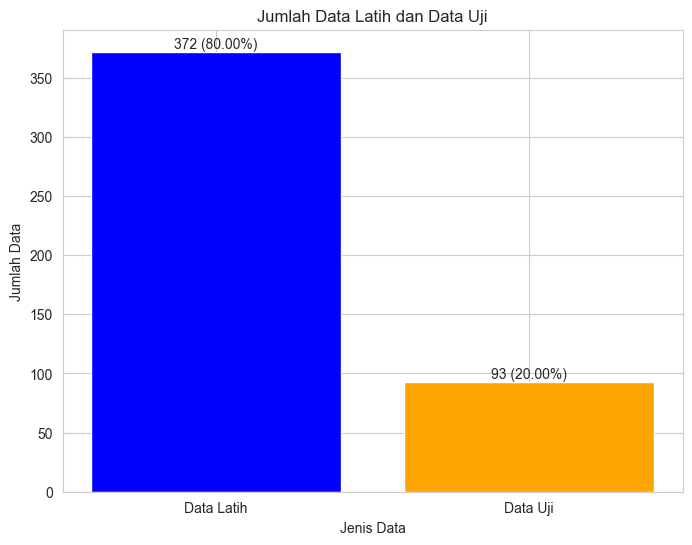

In [54]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, 
             f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

In [55]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# ditambahkan tanggal 14 juli 2025
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score



In [56]:
# Mendefinisikan vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)





In [57]:
# Menampilkan hasil vektorisasi
print("Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized.toarray())

# menampilkan sebagian kecil matriks
print("\nSebagian kecil Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized[:5, :].toarray())

Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian kecil Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
# Membuat dan melatih model SVM
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

# Membuat dan melatih model Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vectorized, y_train)



,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [59]:
# Evaluasi model
y_pred_svm = svm.predict(X_test_vectorized)

# ditambahkan
y_pred_nb = nb.predict(X_test_vectorized)


In [60]:
# Menampilkan confusion matrix dalam angka
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)

# Menampilkan confusion matrix dalam angka untuk Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:")
print(cm_nb)

SVM Confusion Matrix:
[[23  9  0]
 [ 5 35  2]
 [ 1  4 14]]
Naive Bayes Confusion Matrix:
[[25  7  0]
 [13 28  1]
 [ 7  6  6]]


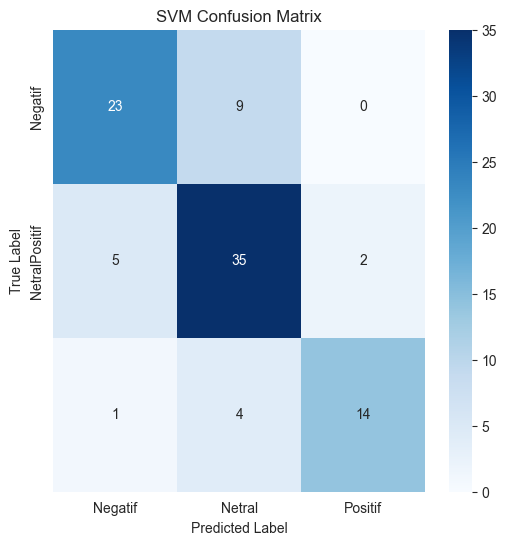

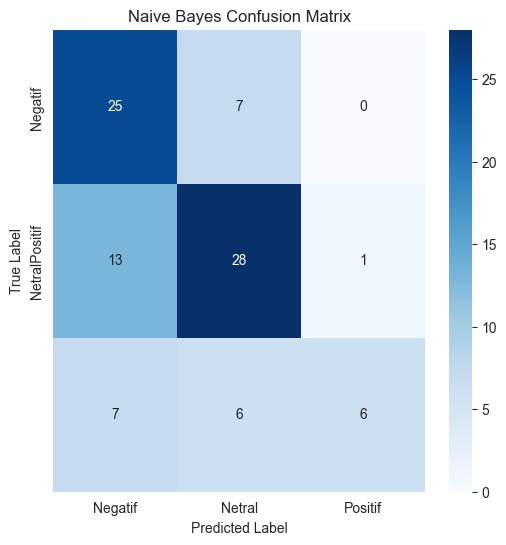

In [61]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negatif', 'Netral', 'Positif'],
                yticklabels=['Negatif', 'Netral' 'Positif'])

    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix("SVM", y_test, y_pred_svm)
# Plot confusion matrix untuk Naive Bayes
plot_confusion_matrix("Naive Bayes", y_test, y_pred_nb)

In [62]:
# Menampilkan accuracy untuk SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("")

accuracy_svm_percentage = accuracy_svm * 100
print("SVM Accuracy:", "{:.2f}%".format(accuracy_svm_percentage))
print("")

# Menampilkan classification report untuk SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


# Menampilkan accuracy untuk Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("")

accuracy_nb_percentage = accuracy_nb * 100
print("Naive Bayes Accuracy:", "{:.2f}%".format(accuracy_nb_percentage))
print("")

# Menampilkan classification report untuk Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

SVM Accuracy: 0.7741935483870968

SVM Accuracy: 77.42%

SVM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.79      0.72      0.75        32
      Netral       0.73      0.83      0.78        42
     Positif       0.88      0.74      0.80        19

    accuracy                           0.77        93
   macro avg       0.80      0.76      0.78        93
weighted avg       0.78      0.77      0.77        93

Naive Bayes Accuracy: 0.6344086021505376

Naive Bayes Accuracy: 63.44%

Naive Bayes Classification Report:
              precision    recall  f1-score   support

     Negatif       0.56      0.78      0.65        32
      Netral       0.68      0.67      0.67        42
     Positif       0.86      0.32      0.46        19

    accuracy                           0.63        93
   macro avg       0.70      0.59      0.60        93
weighted avg       0.67      0.63      0.62        93



In [73]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
import pandas as pd
from datasets import Dataset

# Load data CSV
df = pd.read_csv("Hasil_Labelling_Data.csv")

# (Opsional) Ubah label ke angka
label_map = {'Negatif': 0, 'Netral': 1, 'Positif': 2}
df['label'] = df['Sentiment'].map(label_map)

# Ubah ke Dataset HuggingFace
dataset = Dataset.from_pandas(df[['Review Text', 'label']])


In [3]:
df.head()


,Username,Review Text,Likes,Date,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment,label
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z,Cuman gmn aja bikin birahi aneh njirr,cuman gmn aja bikin birahi aneh njirr,cuman bagaimana saja bikin birahi aneh anjir,"['cuman', 'bagaimana', 'saja', 'bikin', 'birah...","['cuman', 'bikin', 'birahi', 'aneh', 'anjir']",cuman bikin birah aneh anjir,Negatif,0
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z,Mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay nya dari pada...,"['mending', 'versi', 'fanart', 'apa', 'cosplay...","['mending', 'versi', 'fanart', 'cosplay', 'nya...",mending versi fanart cosplay nya versi balok a...,Negatif,0
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z,Kotak kotak anjirr,kotak kotak anjirr,kotak kotak anjir,"['kotak', 'kotak', 'anjir']","['kotak', 'kotak', 'anjir']",kotak kotak anjir,Negatif,0
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,bawa santai aja lah suka gpp yakan kita gbisa ...,bawa santai saja lah suka yakan kita gbisa apa...,"['bawa', 'santai', 'saja', 'lah', 'suka', 'yak...","['bawa', 'santai', 'suka', 'yakan', 'gbisa', '...",bawa santai suka yakan gbisa cantik doang mend...,Netral,1
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z,Terakhirnya cokkk,terakhirnya cokkk,terakhirnya cokkk,"['terakhirnya', 'cokkk']","['terakhirnya', 'cokkk']",akhir cokkk,Netral,1


In [3]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

def tokenize_function(example):
    return tokenizer(example["Review Text"], padding="max_length", truncation=True)

tokenized_dataset = dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/465 [00:00<?, ? examples/s]Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Map: 100%|██████████| 465/465 [00:00<00:00, 1632.95 examples/s]


In [4]:
from datasets import DatasetDict

# Split 80% train, 20% test
split_dataset = tokenized_dataset.train_test_split(test_size=0.2)


In [5]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=3  # Negatif, Netral, Positif
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
from transformers import TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# Metric evaluasi
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1_macro": f1_score(labels, predictions, average='macro'),
    }

# Setup training arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=split_dataset["train"],
    eval_dataset=split_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


C:\Users\user\AppData\Local\Temp\ipykernel_9484\2938667713.py:25: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()


d:\pemula\UAS Otomata\venv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


In [ ]:
eval_result = trainer.evaluate()
print(eval_result)


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9326 - loss: 0.6971 - val_accuracy: 0.8838 - val_loss: 0.3068
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9174 - loss: 0.5606 - val_accuracy: 0.9444 - val_loss: 0.1830
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8940 - loss: 1.2221 - val_accuracy: 0.8737 - val_loss: 0.3724
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8838 - loss: 0.5405 - val_accuracy: 0.8838 - val_loss: 0.2840
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8706 - loss: 0.4980 - val_accuracy: 0.8939 - val_loss: 0.2768


In [140]:
# Evaluasi model
loss, accuracy_lstm = model.evaluate(X_test_pad, y_test_cat, verbose=0)
print("\n✅ LSTM Accuracy: {:.2f}%".format(accuracy_lstm * 100))


✅ LSTM Accuracy: 97.17%


In [141]:
# Prediksi
y_pred_lstm_prob = model.predict(X_test_pad)
y_pred_lstm = y_pred_lstm_prob.argmax(axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


In [142]:
# Confusion matrix dan classification report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lstm = confusion_matrix(y_test_enc, y_pred_lstm)
print("Confusion Matrix LSTM:")
print(cm_lstm)

Confusion Matrix LSTM:
[[  0   0   2]
 [  1   0   1]
 [  2   1 240]]


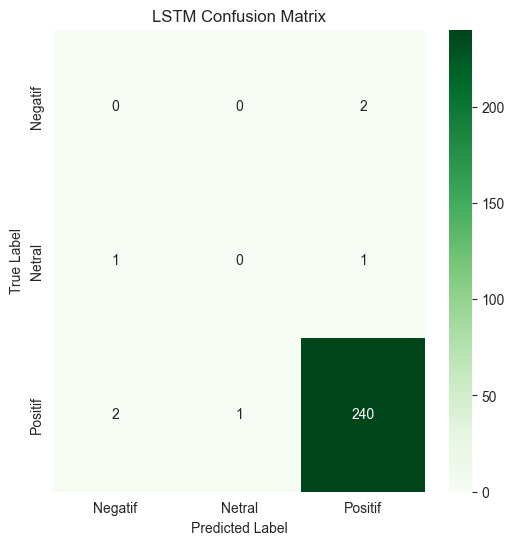

In [143]:
# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [144]:
# Classification report
print("\n✅ LSTM Accuracy: {:.2f}%".format(accuracy_lstm * 100))
print("\nLSTM Classification Report:")
print(classification_report(y_test_enc, y_pred_lstm, target_names=label_encoder.classes_))


✅ LSTM Accuracy: 97.17%

LSTM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         2
      Netral       0.00      0.00      0.00         2
     Positif       0.99      0.99      0.99       243

    accuracy                           0.97       247
   macro avg       0.33      0.33      0.33       247
weighted avg       0.97      0.97      0.97       247



In [63]:
# WORDCLOUD
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.head()

,Username,Review Text,Likes,Date,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,@Mesra-ex2dz,Cuman gmn aja bikin birahi aneh njirr😹,0,2025-07-15T00:07:41Z,Cuman gmn aja bikin birahi aneh njirr,cuman gmn aja bikin birahi aneh njirr,cuman bagaimana saja bikin birahi aneh anjir,"['cuman', 'bagaimana', 'saja', 'bikin', 'birah...","['cuman', 'bikin', 'birahi', 'aneh', 'anjir']",cuman bikin birah aneh anjir,Negatif
1,@anomali_hytam-q2q,Mending versi fanart apa cosplay ny dari pada...,0,2025-07-14T12:39:18Z,Mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay ny dari pada...,mending versi fanart apa cosplay nya dari pada...,"['mending', 'versi', 'fanart', 'apa', 'cosplay...","['mending', 'versi', 'fanart', 'cosplay', 'nya...",mending versi fanart cosplay nya versi balok a...,Negatif
2,@LiusLius-c6p,Kotak kotak anjirr,0,2025-07-14T11:40:57Z,Kotak kotak anjirr,kotak kotak anjirr,kotak kotak anjir,"['kotak', 'kotak', 'anjir']","['kotak', 'kotak', 'anjir']",kotak kotak anjir,Negatif
3,@Aushrtz,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,0,2025-07-14T10:18:36Z,Bawa Santai Aja Lah Suka Gpp Yakan Kita Gbisa ...,bawa santai aja lah suka gpp yakan kita gbisa ...,bawa santai saja lah suka yakan kita gbisa apa...,"['bawa', 'santai', 'saja', 'lah', 'suka', 'yak...","['bawa', 'santai', 'suka', 'yakan', 'gbisa', '...",bawa santai suka yakan gbisa cantik doang mend...,Netral
4,@cisco_Static777,Terakhirnya cokkk☠️💀,0,2025-07-14T07:27:37Z,Terakhirnya cokkk,terakhirnya cokkk,terakhirnya cokkk,"['terakhirnya', 'cokkk']","['terakhirnya', 'cokkk']",akhir cokkk,Netral


In [64]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_positif = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')
sentimen_netral = data[data['Sentiment'] == 'Netral']['steming_data'].str.cat(sep=' ')


In [65]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

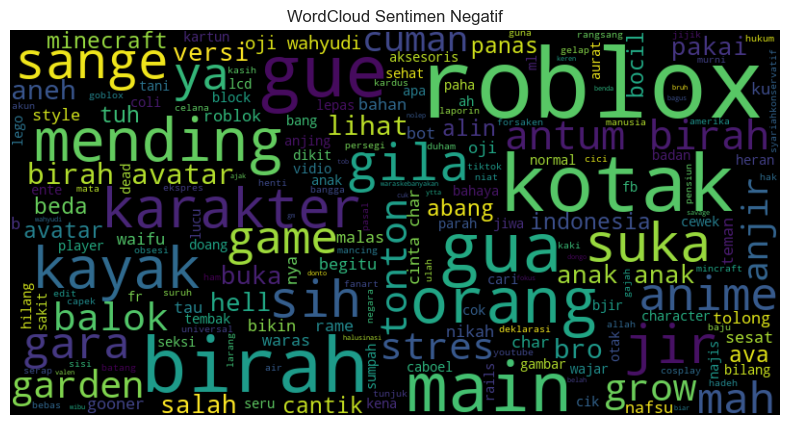

In [67]:
# Membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')


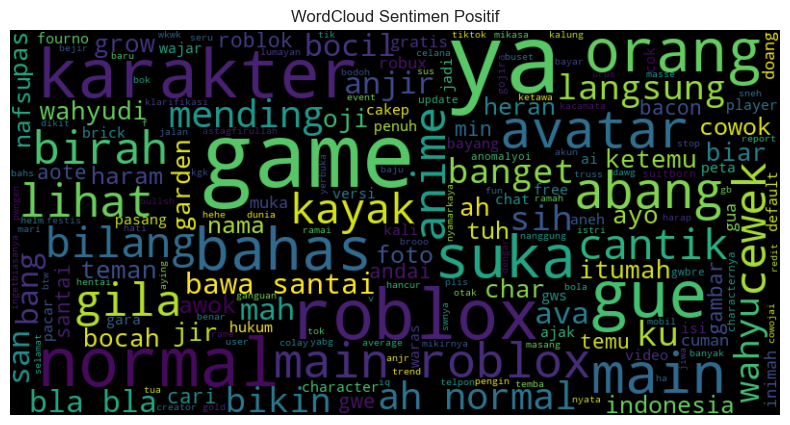

In [68]:
# Membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

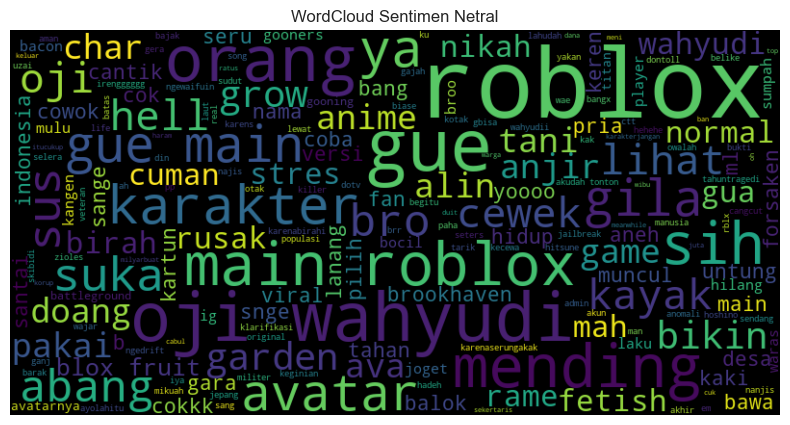

In [69]:
# Membuat WordCloud untuk sentimen netral
create_wordcloud(sentimen_netral, 'WordCloud Sentimen Netral')

In [70]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Username          465 non-null    object
 1   Review Text       465 non-null    object
 2   Likes             465 non-null    int64 
 3   Date              465 non-null    object
 4   cleaning          465 non-null    object
 5   case_folding      465 non-null    object
 6   normalisasi       465 non-null    object
 7   tokenize          465 non-null    object
 8   stopword removal  465 non-null    object
 9   steming_data      465 non-null    object
 10  Sentiment         465 non-null    object
dtypes: int64(1), object(10)
memory usage: 40.1+ KB


In [71]:
import matplotlib.pyplot as plt

rating_counts = data['Rating'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Ranting', fontsize=14, fontweight='bold')
plt.xlabel('Ranting/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()

KeyError: 'Rating'